# Non Graded Challenge 12 : Interferential Statistics

## Objectives
- Memahami konsep hypothesis testing
- Mampu melakukan hypothesis testing dengan Python
- Mampu mengambil kesimpulan dari hasil analisa yang dilakukan

Import libraries

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problems

1. Lakukan hypothesis testing terhadap dataset diatas.
2. Ambil kesimpulan dari hasil analisa.


In [61]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


## Test Hypothesis : Jumlah kasus covid perhari pada tahun 2022 lebih tinggi daripada jumlah kasus covid perhari pada tahun 2021

Membuat kolom baru dengan nama Year untuk memudahkan grouping

In [55]:
#Set data type of column Date to dtype
df['Date'] = pd.to_datetime(df['Date'])

#Make a Year column
df['Year'] = df['Date'].dt.year

#rename New Cases
df = df.rename(columns={'Total Cases': 'Cases'})

#Checking
df.head()

,Date,Location ISO Code,Location,Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Year
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN,2020
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0,2020
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN,2020
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN,2020
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0,2020


In [26]:
#cek data type kolum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

Menghitung rata-rata kasus covid perhari pada masing-masing tahun

In [60]:
Tahun_2020 = df[df['Year'] == 2020][['Date', 'Cases']].groupby('Date').sum()
Tahun_2021 = df[df['Year'] == 2021][['Date', 'Cases']].groupby('Date').sum()
Tahun_2022 = df[df['Year'] == 2022][['Date', 'Cases']].groupby('Date').sum()



print('Average covid case pre 2020: {}'.format(np.round(Tahun_2020.Cases.mean())))
print('Average covid case pre 2021: {}'.format(np.round(Tahun_2021.Cases.mean())))
print('Average covid case pre 2022: {}'.format(np.round(Tahun_2022.Cases.mean())))



Average covid case pre 2020: 4883.0
Average covid case pre 2021: 19264.0
Average covid case pre 2022: 16513.0


### Two Sample One Tailed Hypothesis Testing

- H0: μ_Tahun 2022 <= μ_Tahun 2021
- H1: μ_Tahun 2022 > μ_Tahun 2021

In [78]:
t_stat, p_val = stats.ttest_ind(Tahun_2022, Tahun_2021)
print('P-Value:',p_val[0]/2)
print('t-statistics:', t_stat[0])


P-Value: 0.09313104300255579
t-statistics: -1.3231788807868217


### Karena PV > CV maka H0 gagal untuk direject, yang berarti rata-rata kasus covid per hari pada tahun 2022 berada di bawah rata-rata ksus covid per hari pada tahun 2021

### Two Sample Two Tailed Hypothesis Testing

- H0: μ_Tahun 2022 = μ_Tahun 2021
- H1: μ_Tahun 2022 != μ_Tahun 2021

In [69]:
t_stat, p_val = stats.ttest_ind(Tahun_2021, Tahun_2022)
print('P-Value:',p_val[0])
print('t-statistics:', t_stat[0])


P-Value: 0.18626208600511157
t-statistics: 1.3231788807868217


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2400\2449755762.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tahun_2022_p, label='Average case per 2022',color='blue')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2400\2449755762.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tahun_2021_p, la

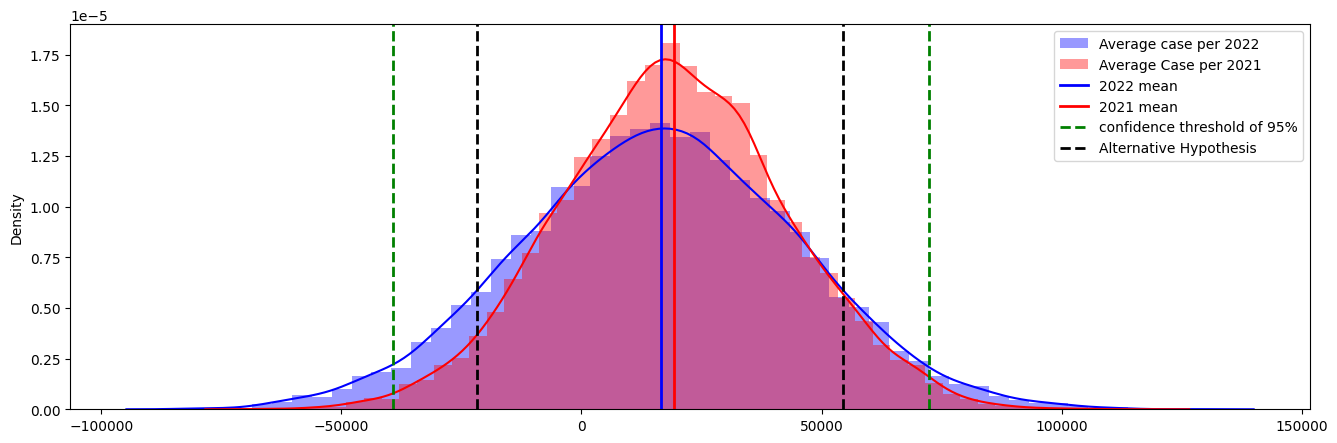

In [77]:
ci = stats.norm.interval(0.95, Tahun_2022.Cases.mean(), Tahun_2022.Cases.std())

#Plot One Tailed
Tahun_2022_p = np.random.normal(Tahun_2022.Cases.mean(), Tahun_2022.Cases.std(), 10000)
Tahun_2021_p = np.random.normal(Tahun_2021.Cases.mean(), Tahun_2021.Cases.std(), 10000)

plt.figure(figsize=(16,5))
sns.distplot(Tahun_2022_p, label='Average case per 2022',color='blue')
sns.distplot(Tahun_2021_p, label='Average Case per 2021',color='red')

plt.axvline(Tahun_2022.Cases.mean(), color='blue', linewidth=2, label='2022 mean')
plt.axvline(Tahun_2021.Cases.mean(), color='red',  linewidth=2, label='2021 mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(Tahun_2022_p.mean()+t_stat[0]*Tahun_2022_p.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Tahun_2022_p.mean()-t_stat[0]*Tahun_2022_p.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()


### PV > CV maka H0 gagal untuk direject yang artinya rata-rata kasus covid perhari tahun 2022 mendekati rata-rata kasus covid perhari tahun 2021